Learnings:
- How to stream data from the Twitter API
- How to filter incoming tweets for keywords
- About API Authentication and OAuth
- How to use the Tweepy Python package

**REST** = is short for Representational State Transfer 

REST API - Allows the user to "read and write Twitter data" 

In order to monitor or process Tweets in that is, to stream Twitter data, however, we'll want to use **Twitter's Streaming API**. In particular, the *Public Streams*.

**Public Streams** = streams of the public data flowing through Twitter. 

**GET statuses/sample** = Returns a small random sample of all public statuses.
 - https://stream.twitter.com/1.1/statuses/sample.json
 
If you wanted to access absolutely *"All public statuses"*, you need to use **Twitter Firehose API**.

Tweets are returned as JSONs and they contain numerous possible fields.You can get:
 - Tweet text
 - User
 - Language
 - Time of tweet
 - Many other fields
 
For begginers the package: **Tweepy** which has nice balance of usability and capability.

In [10]:
# Import package
import pandas as pd
import tweepy, json

In [3]:
access_token = "1202286276914794496-0MzN3vlfp4tq1kHTxb8yejHhjlZSCe"
access_token_secret = "gVpwokNysvILSnzkvYNRmluEiAgScXIBzmHeirb314EPY"
consumer_key = "vuEl7y3tRTF6Tb2r8sTbdRwQD"
consumer_secret = "YC7Rg55GbnOn75KEym3A8H9V6PKci62n6sK4peaQKVadJHgas4"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [7]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [8]:
# Create Streaming object and authenticate 
l = MyStreamListener()
stream = tweepy.Stream(auth, l)

# This lines filters Twitter Streams to capture data by keywords
stream.filter(track = ['apples', 'oranges'])

In [9]:
# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'extended_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [11]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  @michaelutm77 @AaronLemingNFL With Kelce, Hill...   en
1  RT @MR_Marathon1017: @_JuGatti “Apples were ju...   en
2  RT @LeArielleSimone: Foods that reduce mucus a...   en
3  RT @LeArielleSimone: Foods that reduce mucus a...   en
4  RT @KatieKOVEN: Scrooged staring Bill Murray, ...   en


In [12]:
# Create Streaming object and authenticate 
l = MyStreamListener()
stream = tweepy.Stream(auth, l)

# This lines filters Twitter Streams to capture data by keywords
stream.filter(track = ['clinton', 'trump', 'sanders', 'cruz'])

In [13]:
# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [14]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @ChuckCallesto: FBI IMPLICATED In Destroyin...   en
1  'Thug,' 'Threat': Endorsing Impeachment, Top N...   en
2  Jdnzmamksmzmsmzmzmzkkdmmxmmxmz mlm mzmmsmxaam‘...   en
3  RT @Red_Pill_QAnon: 1/2\nQ POST #3750\nNew: Ti...   en
4  RT @LizaRosen101: London's Muslim mayor Sadiq ...   en


In [15]:
import re

#Tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [16]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

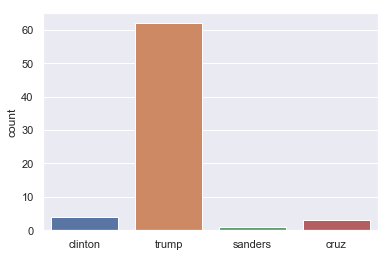

In [18]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()